In [304]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [305]:
import warnings
warnings.filterwarnings('ignore')

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, re

In [307]:
air_reserve = pd.read_csv('air_reserve.csv')
air_visit_data = pd.read_csv('air_visit_data.csv')
air_store_info = pd.read_csv('air_store_info.csv')
hpg_reserve = pd.read_csv('hpg_reserve.csv')
hpg_store_info = pd.read_csv('hpg_store_info.csv')
date_info = pd.read_csv('date_info.csv')
store_id_relation = pd.read_csv('store_id_relation.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [202]:
print(air_reserve.shape)
air_reserve.head()

(92378, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [203]:
print(air_visit_data.shape)
air_visit_data.head()

(252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [204]:
print(air_store_info.shape)
air_store_info.head()

(829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [205]:
print(hpg_reserve.shape)
hpg_reserve.head()

(2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [206]:
print(hpg_store_info.shape)
hpg_store_info.head()

(4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [207]:
print(date_info.shape)
date_info.head()

(517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [208]:
print(store_id_relation.shape)
store_id_relation.head()

(150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [209]:
print(sample_submission.shape)
sample_submission.head()

(32019, 2)


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [210]:
test_df = sample_submission.copy()

In [211]:
# 元々のIDからstore_idとvisit_dateを切り出します
test_df['store_id'] = test_df['id'].str[:20]
test_df['visit_date'] = test_df['id'].str[21:]

# 提出ファイルのサンプルでvisitorsは意味がないのでdropしましょう
test_df.drop(['visitors'], axis=1, inplace=True)

In [212]:
test_df.head()

,id,store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27


In [213]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 3 columns):
id            32019 non-null object
store_id      32019 non-null object
visit_date    32019 non-null object
dtypes: object(3)
memory usage: 750.5+ KB


In [214]:
# 日付の型をobjectからdatetimeに変換しておきましょう
test_df['visit_date'] = pd.to_datetime(test_df['visit_date'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 3 columns):
id            32019 non-null object
store_id      32019 non-null object
visit_date    32019 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 750.5+ KB


In [215]:
test_df.head()

,id,store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27


In [216]:
# air_visit_data.csvを読み込む、parse_datesでdatetime型へ変換しておく
air_data = pd.read_csv('air_visit_data.csv', parse_dates=['visit_date'])
air_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [217]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null datetime64[ns]
visitors        252108 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ MB


In [218]:
# 予測するレストランIDを1つ使ってair_dataから実客数をみてみる
check_store_sample = air_data[air_data['air_store_id'] == 'air_00a91d42b08b08d9']
print(check_store_sample.shape)
check_store_sample.head()

(232, 3)


,air_store_id,visit_date,visitors
87534,air_00a91d42b08b08d9,2016-07-01,35
87535,air_00a91d42b08b08d9,2016-07-02,9
87536,air_00a91d42b08b08d9,2016-07-04,20
87537,air_00a91d42b08b08d9,2016-07-05,25
87538,air_00a91d42b08b08d9,2016-07-06,29


In [219]:
# 基本統計量の確認
check_store_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,232.0,26.081897,12.435364,1.0,18.0,26.0,34.0,99.0


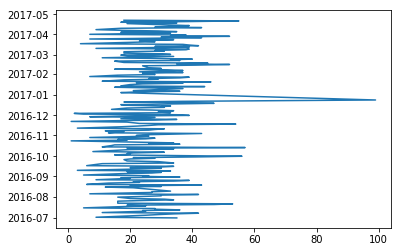

In [220]:
plt.plot(check_store_sample.iloc[:,2], check_store_sample.iloc[:,1])

In [221]:
# visit_dateの確認
check_store_sample.visit_date.describe()

count                     232
unique                    232
top       2016-09-08 00:00:00
freq                        1
first     2016-07-01 00:00:00
last      2017-04-22 00:00:00
Name: visit_date, dtype: object

In [222]:
# air_dataの日付（visit_date）を曜日（dow）へ変換する
air_data['dow'] = air_data['visit_date'].dt.dayofweek
air_data.head()

,air_store_id,visit_date,visitors,dow
0,air_ba937bf13d40fb24,2016-01-13,25,2
1,air_ba937bf13d40fb24,2016-01-14,32,3
2,air_ba937bf13d40fb24,2016-01-15,29,4
3,air_ba937bf13d40fb24,2016-01-16,22,5
4,air_ba937bf13d40fb24,2016-01-18,6,0


In [223]:
# air_dataから2017-01-28以降のデータを切り出して訓練データ「train」へ格納
train = air_data[air_data['visit_date'] > '2017-01-28'].reset_index()

In [224]:
print(train.shape)
train.head()

(59847, 5)


,index,air_store_id,visit_date,visitors,dow
0,313,air_ba937bf13d40fb24,2017-01-29,1,6
1,314,air_ba937bf13d40fb24,2017-01-30,4,0
2,315,air_ba937bf13d40fb24,2017-01-31,12,1
3,316,air_ba937bf13d40fb24,2017-02-01,10,2
4,317,air_ba937bf13d40fb24,2017-02-02,19,3


In [225]:
# trainとtest_dfも日付を曜日へ変換して「dow」をカラム追加する
train['dow'] = train['visit_date'].dt.dayofweek
test_df['dow'] = test_df['visit_date'].dt.dayofweek

In [226]:
train.head()

,index,air_store_id,visit_date,visitors,dow
0,313,air_ba937bf13d40fb24,2017-01-29,1,6
1,314,air_ba937bf13d40fb24,2017-01-30,4,0
2,315,air_ba937bf13d40fb24,2017-01-31,12,1
3,316,air_ba937bf13d40fb24,2017-02-01,10,2
4,317,air_ba937bf13d40fb24,2017-02-02,19,3


In [227]:
test_df.head()

,id,store_id,visit_date,dow
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,6
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,2
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,3


In [228]:
# pandasのagg関数で使うリストを作成
aggregation = {'visitors' : {'total_visitors' : 'median'}}
# trainからair_store_idとdowをグルーピングしてvisitorsの中央値（median）を算出
agg_data = train.groupby(['air_store_id', 'dow']).agg(aggregation).reset_index()

/Users/keisuke/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [229]:
pd.set_option('display.max_rows', 10)

In [230]:
# 以下の「test」の方法でも同じだと思われる。
test = train.groupby(['air_store_id', 'dow']).median()
test

index  visitors
air_store_id         dow                    
air_00a91d42b08b08d9 0     87726.0      24.0
                     1     87730.0      30.5
                     2     87731.0      28.0
                     3     87732.0      33.5
                     4     87733.0      37.0
...                            ...       ...
air_fff68b929994bfbd 2    194987.0       4.0
                     3    194988.0       3.5
                     4    194989.0       6.5
                     5    194990.0       7.5
                     6    194994.0       2.0

[5586 rows x 2 columns]

In [231]:
test.reset_index()

,air_store_id,dow,index,visitors
0,air_00a91d42b08b08d9,0,87726.0,24.0
1,air_00a91d42b08b08d9,1,87730.0,30.5
2,air_00a91d42b08b08d9,2,87731.0,28.0
3,air_00a91d42b08b08d9,3,87732.0,33.5
4,air_00a91d42b08b08d9,4,87733.0,37.0
...,...,...,...,...
5581,air_fff68b929994bfbd,2,194987.0,4.0
5582,air_fff68b929994bfbd,3,194988.0,3.5
5583,air_fff68b929994bfbd,4,194989.0,6.5
5584,air_fff68b929994bfbd,5,194990.0,7.5


In [232]:
agg_data.columns

MultiIndex(levels=[['visitors', 'dow', 'air_store_id'], ['total_visitors', '']],
           labels=[[2, 1, 0], [1, 1, 0]])

In [233]:
agg_data

,air_store_id,dow,visitors
,,,total_visitors
0,air_00a91d42b08b08d9,0,24.0
1,air_00a91d42b08b08d9,1,30.5
2,air_00a91d42b08b08d9,2,28.0
3,air_00a91d42b08b08d9,3,33.5
4,air_00a91d42b08b08d9,4,37.0
...,...,...,...
5581,air_fff68b929994bfbd,2,4.0
5582,air_fff68b929994bfbd,3,3.5
5583,air_fff68b929994bfbd,4,6.5


In [234]:
# agg_dataのカラム名をつける
agg_data.columns = ['air_store_id', 'dow', 'visitors']
agg_data.columns

Index(['air_store_id', 'dow', 'visitors'], dtype='object')

In [235]:
# agg_data['visitors']= agg_data['visitors']
print(agg_data.shape)
agg_data.head(12)

(5586, 3)


,air_store_id,dow,visitors
0,air_00a91d42b08b08d9,0,24.0
1,air_00a91d42b08b08d9,1,30.5
2,air_00a91d42b08b08d9,2,28.0
3,air_00a91d42b08b08d9,3,33.5
4,air_00a91d42b08b08d9,4,37.0
...,...,...,...
7,air_0164b9927d20bcc3,1,10.5
8,air_0164b9927d20bcc3,2,8.0
9,air_0164b9927d20bcc3,3,11.5
10,air_0164b9927d20bcc3,4,7.0


In [236]:
print(test_df.shape)
test_df.head(12)

(32019, 4)


,id,store_id,visit_date,dow
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,6
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,2
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,3
...,...,...,...,...
7,air_00a91d42b08b08d9_2017-04-30,air_00a91d42b08b08d9,2017-04-30,6
8,air_00a91d42b08b08d9_2017-05-01,air_00a91d42b08b08d9,2017-05-01,0
9,air_00a91d42b08b08d9_2017-05-02,air_00a91d42b08b08d9,2017-05-02,1
10,air_00a91d42b08b08d9_2017-05-03,air_00a91d42b08b08d9,2017-05-03,2


In [237]:
# test_dfとagg_dataのstoreid_id、dowをすり合わせmergeさせる（leftのみに削ぎ落として、左と右のcolumnsを指定してる）
merged = pd.merge(test_df, agg_data, how='left', 
                left_on=['store_id', 'dow'], right_on=['air_store_id', 'dow'])
print(merged.shape)
merged.head(20)

(32019, 6)


,id,store_id,visit_date,dow,air_store_id,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,6,NaN,NaN
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0,air_00a91d42b08b08d9,24.0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,1,air_00a91d42b08b08d9,30.5
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,2,air_00a91d42b08b08d9,28.0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,3,air_00a91d42b08b08d9,33.5
...,...,...,...,...,...,...
15,air_00a91d42b08b08d9_2017-05-08,air_00a91d42b08b08d9,2017-05-08,0,air_00a91d42b08b08d9,24.0
16,air_00a91d42b08b08d9_2017-05-09,air_00a91d42b08b08d9,2017-05-09,1,air_00a91d42b08b08d9,30.5
17,air_00a91d42b08b08d9_2017-05-10,air_00a91d42b08b08d9,2017-05-10,2,air_00a91d42b08b08d9,28.0
18,air_00a91d42b08b08d9_2017-05-11,air_00a91d42b08b08d9,2017-05-11,3,air_00a91d42b08b08d9,33.5


In [238]:
# idとvisitorsだけをfinalへ格納
final = merged[['id', 'visitors']]
print(final.shape)
final.head()

(32019, 2)


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,NaN
1,air_00a91d42b08b08d9_2017-04-24,24.0
2,air_00a91d42b08b08d9_2017-04-25,30.5
3,air_00a91d42b08b08d9_2017-04-26,28.0
4,air_00a91d42b08b08d9_2017-04-27,33.5


In [239]:
# NaNを探してテーブルにする関数
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns 

In [240]:
# finalのNaNを確認してみよう
missing_values_table(final)

,Missing Values,% of Total Values
id,0,0.000000
visitors,1114,3.479184


In [241]:
# fillna関数を使ってvisitorsのNaNへ0を入れておく
final.fillna(0, inplace=True)
# 念のため確認
missing_values_table(final)

/Users/keisuke/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Missing Values,% of Total Values
id,0,0.0
visitors,0,0.0


In [242]:
date_info = pd.read_csv('date_info.csv')

In [243]:
print(date_info.shape)
date_info.head()

(517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [244]:
# data_infoの祝日フラグが1（オン）のデータを確認
date_info[date_info['holiday_flg'] == 1].head(10)

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
10,2016-01-11,Monday,1
41,2016-02-11,Thursday,1
79,2016-03-20,Sunday,1
80,2016-03-21,Monday,1
119,2016-04-29,Friday,1
123,2016-05-03,Tuesday,1
124,2016-05-04,Wednesday,1


In [245]:
TF = (date_info.day_of_week == 'Saturday') | (date_info.day_of_week == 'Sunday')
date_info.loc[TF, 'holiday_flg'] = 0  # locで[行, 列]指定をしている。つまり行を全て指定して列をこれで指定。
# date_info.loc[TF].holiday_flg = 0　としてはだめ！

In [246]:
TF

0      False
1       True
2       True
3      False
4      False
       ...  
512     True
513     True
514    False
515    False
516    False
Name: day_of_week, Length: 517, dtype: bool

In [247]:
#　index/全体の長さで重み付け
date_info['weight'] = (date_info.index + 1) / len(date_info) 

In [248]:
print(date_info.shape)
date_info.head()

(517, 4)


,calendar_date,day_of_week,holiday_flg,weight
0,2016-01-01,Friday,1,0.001934
1,2016-01-02,Saturday,0,0.003868
2,2016-01-03,Sunday,0,0.005803
3,2016-01-04,Monday,0,0.007737
4,2016-01-05,Tuesday,0,0.009671


In [249]:
print(air_visit_data.shape)
air_visit_data.head()

(252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [250]:
# air_visit_dataと重みを追加したdate_infoをマージさせてvisit_dataを作成
# visit_dataから不必要なcalendar_dateを落とす
visit_data = air_visit_data.merge(date_info, 
                                  left_on='visit_date', right_on='calendar_date', how='left')

In [251]:
print(visit_data.shape)
visit_data.head()

(252108, 7)


,air_store_id,visit_date,visitors,calendar_date,day_of_week,holiday_flg,weight
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,0.025145
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,0.027079
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,0.029014
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,0.030948
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,0.034816


In [252]:
visit_data.drop('calendar_date', axis=1, inplace=True)
visit_data.visitors = np.log1p(visit_data.visitors) # 下のようなグラフになってしまっているからlogとるよ
#visit_data['visitors'] = visit_data.visitors.map(np.log1p)

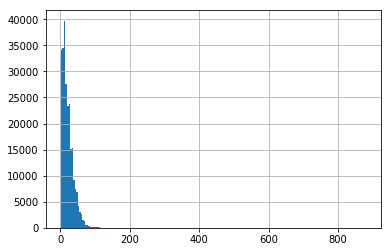

In [253]:
np.exp(visit_data.visitors).hist(bins=200)

In [254]:
pd.set_option('display.max_rows', 10)
np.exp(visit_data.visitors).sort_values(ascending=False)

85314     878.0
214825    778.0
72836     676.0
172123    628.0
143894    515.0
          ...  
123643      2.0
130124      2.0
248439      2.0
88861       2.0
51576       2.0
Name: visitors, Length: 252108, dtype: float64

In [255]:
visit_data

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weight
0,air_ba937bf13d40fb24,2016-01-13,3.258097,Wednesday,0,0.025145
1,air_ba937bf13d40fb24,2016-01-14,3.496508,Thursday,0,0.027079
2,air_ba937bf13d40fb24,2016-01-15,3.401197,Friday,0,0.029014
3,air_ba937bf13d40fb24,2016-01-16,3.135494,Saturday,0,0.030948
4,air_ba937bf13d40fb24,2016-01-18,1.945910,Monday,0,0.034816
...,...,...,...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,1.945910,Tuesday,0,0.916828
252104,air_24e8414b9b07decb,2017-04-19,1.945910,Wednesday,0,0.918762
252105,air_24e8414b9b07decb,2017-04-20,2.079442,Thursday,0,0.920696
252106,air_24e8414b9b07decb,2017-04-21,2.197225,Friday,0,0.922631


In [256]:
pd.set_option('display.max_rows', 20)

In [257]:
visit_data.groupby(['air_store_id', 'day_of_week', 'holiday_flg']).sum()

visitors     weight
air_store_id         day_of_week holiday_flg                       
air_00a91d42b08b08d9 Friday      0            143.804406  25.613153
                     Monday      0            103.894996  21.885880
                                 1              3.091042   0.441006
                     Saturday    0             95.213904  24.112186
                     Sunday      0              1.098612   0.655706
                     Thursday    0            129.269283  24.764023
                     Tuesday     0            125.376948  25.435203
                     Wednesday   0            133.090937  25.593810
air_0164b9927d20bcc3 Friday      0             60.876571  19.195358
                                 1              5.488938   1.398453
...                                                  ...        ...
air_fff68b929994bfbd Friday      1              2.995732   1.398453
                     Monday      0             49.237683  21.355899
                                 1              3.871201   1.810445
                     Saturday    0             84.036245  26.303675
                     Sunday      0             44.907875  19.589942
                     Thursday    0             59.076275  24.344294
                                 1              7.473069   2.247582
                     Tuesday     0             59.781490  23.943907
                                 1              0.693147   0.713733
                     Wednesday   0             65.038843  26.295938

[9103 rows x 2 columns]

In [258]:
pd.set_option('display.max_rows', 8)

In [259]:
wmean = lambda x:((x.weight * x.visitors).sum() / x.weight.sum())
visitors = visit_data.groupby(
['air_store_id', 'day_of_week', 'holiday_flg']).apply(wmean).reset_index()
#index3つを残して、columnsの2つを wmean　で'0'に変換している

visitors

,air_store_id,day_of_week,holiday_flg,0
0,air_00a91d42b08b08d9,Friday,0,3.590026
1,air_00a91d42b08b08d9,Monday,0,3.091672
2,air_00a91d42b08b08d9,Monday,1,3.091042
3,air_00a91d42b08b08d9,Saturday,0,2.526836
...,...,...,...,...
9099,air_fff68b929994bfbd,Thursday,1,1.921000
9100,air_fff68b929994bfbd,Tuesday,0,1.602599
9101,air_fff68b929994bfbd,Tuesday,1,0.693147
9102,air_fff68b929994bfbd,Wednesday,0,1.577173


In [260]:
visitors.rename(columns={0:'visitors'}, inplace=True) 

In [273]:
sample_submission

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
...,...,...
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0
32018,air_fff68b929994bfbd_2017-05-31,0


In [274]:
sample_submission.id.map(lambda x: x.split('_'))

0        [air, 00a91d42b08b08d9, 2017-04-23]
1        [air, 00a91d42b08b08d9, 2017-04-24]
2        [air, 00a91d42b08b08d9, 2017-04-25]
3        [air, 00a91d42b08b08d9, 2017-04-26]
                        ...                 
32015    [air, fff68b929994bfbd, 2017-05-28]
32016    [air, fff68b929994bfbd, 2017-05-29]
32017    [air, fff68b929994bfbd, 2017-05-30]
32018    [air, fff68b929994bfbd, 2017-05-31]
Name: id, Length: 32019, dtype: object

In [275]:
sample_submission.id.map(lambda x: '_'.join(x.split('_')[:-1]))

0        air_00a91d42b08b08d9
1        air_00a91d42b08b08d9
2        air_00a91d42b08b08d9
3        air_00a91d42b08b08d9
                 ...         
32015    air_fff68b929994bfbd
32016    air_fff68b929994bfbd
32017    air_fff68b929994bfbd
32018    air_fff68b929994bfbd
Name: id, Length: 32019, dtype: object

In [276]:
# sample_submissionのIDをレストランIDや日付に分ける
sample_submission['air_store_id'] = sample_submission.id.map(
                                    lambda x: '_'.join(x.split('_')[:-1]))

In [277]:
sample_submission['calendar_date'] = sample_submission.id.map(
                                    lambda x: x.split('_')[2])

In [278]:
sample_submission.head()

,id,visitors,air_store_id,calendar_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27


In [281]:
print(date_info.shape)
date_info.head()

(517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [280]:
# 重み付き平均で予測したvisitorsとsample_submissionをマージする
sample_submission.drop('visitors', axis=1, inplace=True)
sample_submission = sample_submission.merge(date_info, on='calendar_date', how='left')
print(sample_submission.shape)
sample_submission

(32019, 5)


,id,air_store_id,calendar_date,day_of_week,holiday_flg
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,Sunday,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,Monday,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,Tuesday,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,Wednesday,0
...,...,...,...,...,...
32015,air_fff68b929994bfbd_2017-05-28,air_fff68b929994bfbd,2017-05-28,Sunday,0
32016,air_fff68b929994bfbd_2017-05-29,air_fff68b929994bfbd,2017-05-29,Monday,0
32017,air_fff68b929994bfbd_2017-05-30,air_fff68b929994bfbd,2017-05-30,Tuesday,0
32018,air_fff68b929994bfbd_2017-05-31,air_fff68b929994bfbd,2017-05-31,Wednesday,0


In [286]:
print(visitors.shape)
visitors.head()

(9103, 4)


,air_store_id,day_of_week,holiday_flg,visitors
0,air_00a91d42b08b08d9,Friday,0,3.590026
1,air_00a91d42b08b08d9,Monday,0,3.091672
2,air_00a91d42b08b08d9,Monday,1,3.091042
3,air_00a91d42b08b08d9,Saturday,0,2.526836
4,air_00a91d42b08b08d9,Sunday,0,1.098612


In [284]:
sample_submission = sample_submission.merge(
visitors, on=['air_store_id', 'day_of_week', 'holiday_flg'], how='left')
print(sample_submission.shape)
sample_submission.head()

(32019, 6)


,id,air_store_id,calendar_date,day_of_week,holiday_flg,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,Sunday,0,1.098612
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,Monday,0,3.091672
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,Tuesday,0,3.173611
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,Wednesday,0,3.330028
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,Thursday,0,3.414904


In [287]:
missing_values_table(sample_submission)

,Missing Values,% of Total Values
id,0,0.000000
air_store_id,0,0.000000
calendar_date,0,0.000000
day_of_week,0,0.000000
holiday_flg,0,0.000000
visitors,1485,4.637871


In [290]:
# 「air_store_id」と「 day_of_week」のみで欠損データに重み平均を入れる
missings = sample_submission.visitors.isnull()
sample_submission.loc[missings, 'visitors'] = sample_submission[missings].merge(
visitors[visitors.holiday_flg==0], on=(
'air_store_id', 'day_of_week'), how='left')['visitors_y'].values

missing_values_table(sample_submission)

,Missing Values,% of Total Values
id,0,0.000000
air_store_id,0,0.000000
calendar_date,0,0.000000
day_of_week,0,0.000000
holiday_flg,0,0.000000
visitors,448,1.399169


In [291]:
# 「air_store_id」のみの重み付き平均を計算して欠損データへ入れる
missings = sample_submission.visitors.isnull()
sample_submission.loc[missings, 'visitors'] = sample_submission[missings].merge(
visitors[['air_store_id', 'visitors']].groupby('air_store_id').mean().reset_index(), 
on='air_store_id', how='left')['visitors_y'].values

missing_values_table(sample_submission)

,Missing Values,% of Total Values
id,0,0.0
air_store_id,0,0.0
calendar_date,0,0.0
day_of_week,0,0.0
holiday_flg,0,0.0
visitors,0,0.0


In [296]:
# visitorsをnp.expm1で処理して実客数へ戻す
sample_submission['visitors'] = np.expm1(sample_submission.visitors)
# 提出フォーマットの規定に合うように処理してsub_fileへ格納
sample_submission = sample_submission[['id', 'visitors']]
final['visitors'][final['visitors'] ==0] = sample_submission['visitors'][final['visitors'] ==0]
sub_file = final.copy()

print(sub_file.shape)
sub_file.head()

(32019, 2)


/Users/keisuke/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/keisuke/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/keisuke/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_glob

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,2.0
1,air_00a91d42b08b08d9_2017-04-24,24.0
2,air_00a91d42b08b08d9_2017-04-25,30.5
3,air_00a91d42b08b08d9_2017-04-26,28.0
4,air_00a91d42b08b08d9_2017-04-27,33.5


In [298]:
# 算術平均をnp.meanで算出
sub_file['visitors'] = np.mean([final['visitors'], sample_submission['visitors']], axis = 0)
sub_file.to_csv('sub_math_mean_1.csv', index=False)
# 相乗平均を算出
sub_file['visitors'] = (final['visitors'] * sample_submission['visitors']) ** (1/2)
sub_file.to_csv('sub_geo_mean_1.csv', index=False)
# 調和平均を算出
sub_file['visitors'] = 2/(1/final['visitors'] + 1/sample_submission['visitors'])
sub_file.to_csv('sub_hrm_mean_1.csv', index=False)